importing Jupyter notebook from Data_Get.ipynb
      day_of_week  brand   cnt
date                          
1               3      1    20
1               3      5    48
2               4      1    16
2               4      3    20
3               5      1  1411
3               5      2   811
3               5      3  1005
3               5      4   773
3               5      5  1565
4               6      1  1176
4               6      2   824
4               6      3   802
4               6      4  1057
4               6      5  1107
5               7      1   812
5               7      2   549
5               7      3   579
5               7      4   759
5               7      5   647
6               1      1   889

输出各变量的 均值 标准差 中位数 方差 极差 变异系数 四分位数间距：

       day_of_week      brand            cnt
count    20.000000  20.000000      20.000000
mean      5.250000   2.800000     743.500000
std       1.618154   1.542384     446.140584
min       1.000000   1.000000      16.000000
25%    

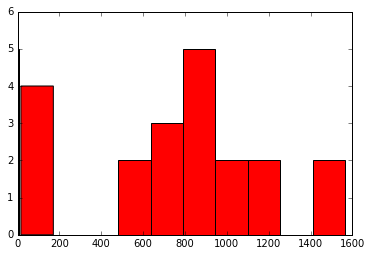


折线图：



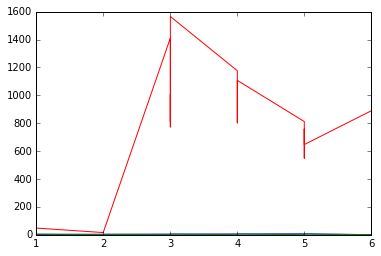


帕累托图：



KeyError: 'num'

In [1]:
#-*- coding: utf-8 -*-
import Ipynb_importer #导入ipythonnotebook文件，实现jupyter文件的解析调用
import Data_Get 
import matplotlib.pyplot as plt

# **************
# 输入数据
# **************
data=Data_Get.get_ExcelData() #获取数据
data=data.head(20)
print data


# **************
# a.统计量
# **************
# 1.集中分析，均值 中位数 众数
# 2.离中分析，极差 标准差方差 变异系数 四分位数间距
statistics = data.describe() #保存基本统计量
statistics.loc['var'] = statistics.loc['std']*statistics.loc['std'] #方差
statistics.loc['range'] = statistics.loc['max']-statistics.loc['min'] #极差
statistics.loc['cha'] = statistics.loc['std']/statistics.loc['mean'] #变异系数
statistics.loc['dis'] = statistics.loc['75%']-statistics.loc['25%'] #四分位数间距
mode=data.mode()
print ("\n输出各变量的 均值 标准差 中位数 方差 极差 变异系数 四分位数间距：\n")
print statistics
print ("\n输出各变量的 众数：\n")
print mode
# 3.频率分布直方图
print ("\n频率分布直方图：\n")
for i in data.columns:
    plt.hist(data[i],10)
plt.show()
# 4.偏态%%峰态分析，正态分布图 标准正态分布图


# **************
# b.对比分析
# **************
# print df.groupby(by="a")
# 1.绝对值分析
# 2.相对值分析
# 3.周期性分析
print ("\n折线图：\n")
for i in data.columns:   
    x=data.index
    y=data[i]
    plt.plot(x,y)
plt.show()


# **************
# c.变量关系分析
# **************
# 1.帕累托图
print ("\n帕累托图：\n")
plt.figure()
# 排序
data_pareto=data['num'].copy() #选取某一列数据作图
data_pareto=data_pareto.sort_values(ascending=False)
data_pareto.plot(kind='bar')
# 累积值计算
p=1.0*data_pareto.cumsum()/data_pareto.sum()
p.plot(color = 'g', secondary_y = True, style = '-*',linewidth = 2,use_index=False)
# 标注临界点
for i in range(len(p)):
    if p[i]>0.8:
        break
print ("\n在第 %d 项 %s 处累积值已大于80%%临界值！\n" % (i+1,p.index[i]))
plt.annotate(format(p[i], '.2%'), xy = (12, p[i]), xytext=(12, p[i]*0.9), arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2")) 
plt.show()
# 2.散点图&&相关性分析
print ("\n散点图：\n")
plt.scatter(data.index,data[u'销量'],marker = 'x', color = 'm',) 
plt.scatter(data.index,data['num'],marker = '+', color = 'c',) 
plt.show()
print ("\n各变量的相关系数为：\n")
data.corr() #显示相关系数矩阵
# print data.corr()['num'] #只显示某个变量相对其它变量的相关系数
# print data['num'].corr(data['num2']) #显示某变量相对另一个变量的相关系数
